In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from prophet import Prophet
import numpy as np

/home/gustavo/anaconda3/envs/wilec/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Read database
input_path = '../Predictive_Maintenance_free_dataset/Datasets/dataset_TPV/base_pump_23042023_A_resampled_1min_from_22032023.csv'     # INPUT
df = pd.read_csv(input_path)

df = df[['Time', 'temperature']]
df['Time'] = pd.to_datetime(df['Time'])
df.rename(columns={'Time' : 'ds', 'temperature' : 'y'}, inplace=True)
df

# df = df[df['ds'].dt.hour < 6]

,ds,y
0,2023-03-22 00:01:00,51.0
1,2023-03-22 00:02:00,51.0
2,2023-03-22 00:03:00,51.0
3,2023-03-22 00:04:00,51.0
4,2023-03-22 00:05:00,51.0
...,...,...
32521,2023-04-13 14:02:00,51.0
32522,2023-04-13 14:03:00,51.0
32523,2023-04-13 14:04:00,51.0
32524,2023-04-13 14:05:00,51.5


In [10]:
# Split train and test data

# Use it to select future window in frames
n_obs = 144*70       # Window forecast for 1 day. (1 frame = 1 min.)

# Use it to normalize data
# X_train, X_test = normalized_df[0:-n_obs], normalized_df[-n_obs:]
# X_train, X_test = normalized_df[0:-n_obs], normalized_df[-n_obs:]

# Use it to DO NOT normalize data
X_train, X_test = df[0:-n_obs], df[-n_obs:]
# X_train, X_test = df[0:-n_obs], df[-n_obs:]

In [11]:
# Using prophet (fit process)

prof = Prophet()
prof.fit(X_train)

09:08:16 - cmdstanpy - INFO - Chain [1] start processing
09:08:51 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# Make future
# period = df.shape[0] + 144*70  # INPUT
# # freq_ = pd.to_timedelta(df['ds'][1] - df['ds'][0])
# freq_ = '60S'

# future = prof.make_future_dataframe(periods=period, freq=freq_)
# print(future.tail())


# print("Input data total interval: ", end='')
# print(pd.to_timedelta(df['ds'][df['ds'].last_valid_index()] - df['ds'][0]))
# print("Input data number of samples: ", end='')
# print(df['ds'].last_valid_index())
# print("Input data period: ", end='')
# print(pd.to_timedelta(df['ds'][1] - df['ds'][0]))

# print("#########")

# print("Predict total interval: ", end='')
# print(pd.to_timedelta(future['ds'][future['ds'].last_valid_index()] - future['ds'][0]))
# print("Predict number of samples: ", end='')
# print(future['ds'].last_valid_index())
# print("Predict data period: ", end='')
# print(pd.to_timedelta(future['ds'][1] - future['ds'][0]))

                       ds
65047 2023-05-06 04:08:00
65048 2023-05-06 04:09:00
65049 2023-05-06 04:10:00
65050 2023-05-06 04:11:00
65051 2023-05-06 04:12:00
Input data total interval: 22 days 14:05:00
Input data number of samples: 32525
Input data period: 0 days 00:01:00
#########
Predict total interval: 45 days 04:11:00
Predict number of samples: 65051
Predict data period: 0 days 00:01:00


In [ ]:
# print("Input data total interval: ", end='')
# print(pd.to_timedelta(X_test['ds'][X_test['ds'].last_valid_index()] - X_test['ds'][0]))
# print("Input data number of samples: ", end='')
# print(X_test['ds'].last_valid_index())
# print("Input data period: ", end='')
# print(pd.to_timedelta(X_test['ds'][1] - X_test['ds'][0]))

# print("#########")

# print("Predict total interval: ", end='')
# print(pd.to_timedelta(X_train['ds'][X_train['ds'].last_valid_index()] - X_train['ds'][0]))
# print("Predict number of samples: ", end='')
# print(X_train['ds'].last_valid_index())
# print("Predict data period: ", end='')
# print(pd.to_timedelta(X_train['ds'][1] - X_train['ds'][0]))

In [13]:
X_test_2 = X_test.copy()

X_test_2 = pd.DataFrame({"ds":X_test_2['ds'].tolist()})

In [15]:
# Forecast
forecast = prof.predict(X_test_2)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

forecast['yhat'].tail()

10075    49.947049
10076    49.962100
10077    49.977156
10078    49.992217
10079    50.007283
Name: yhat, dtype: float64

<Figure size 640x480 with 0 Axes>

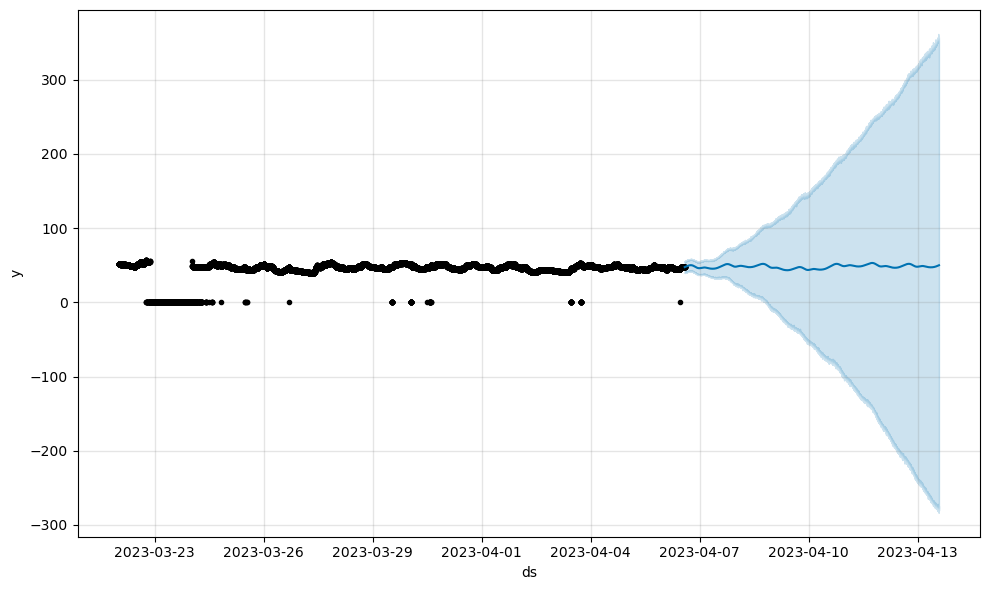

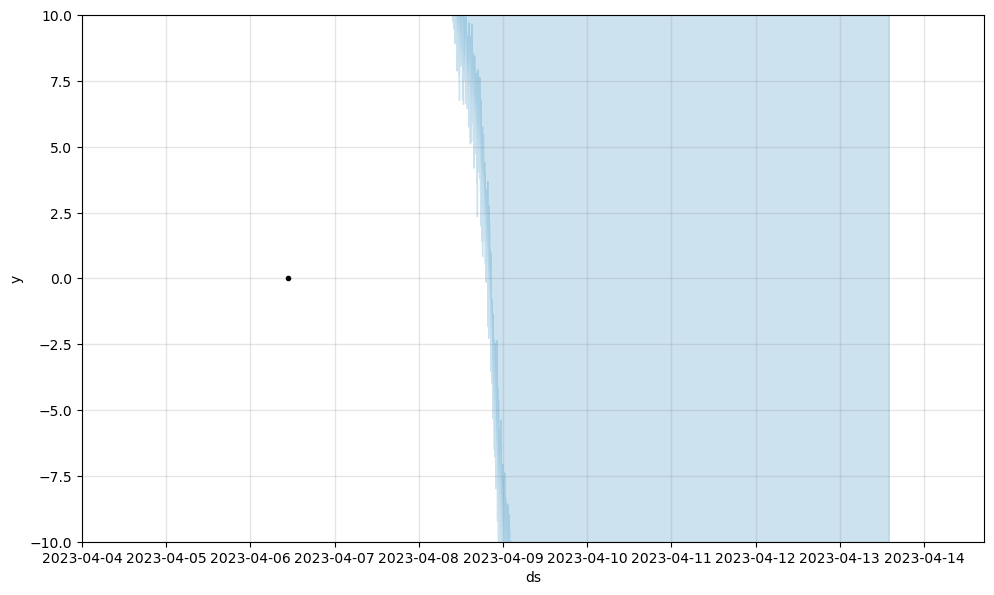

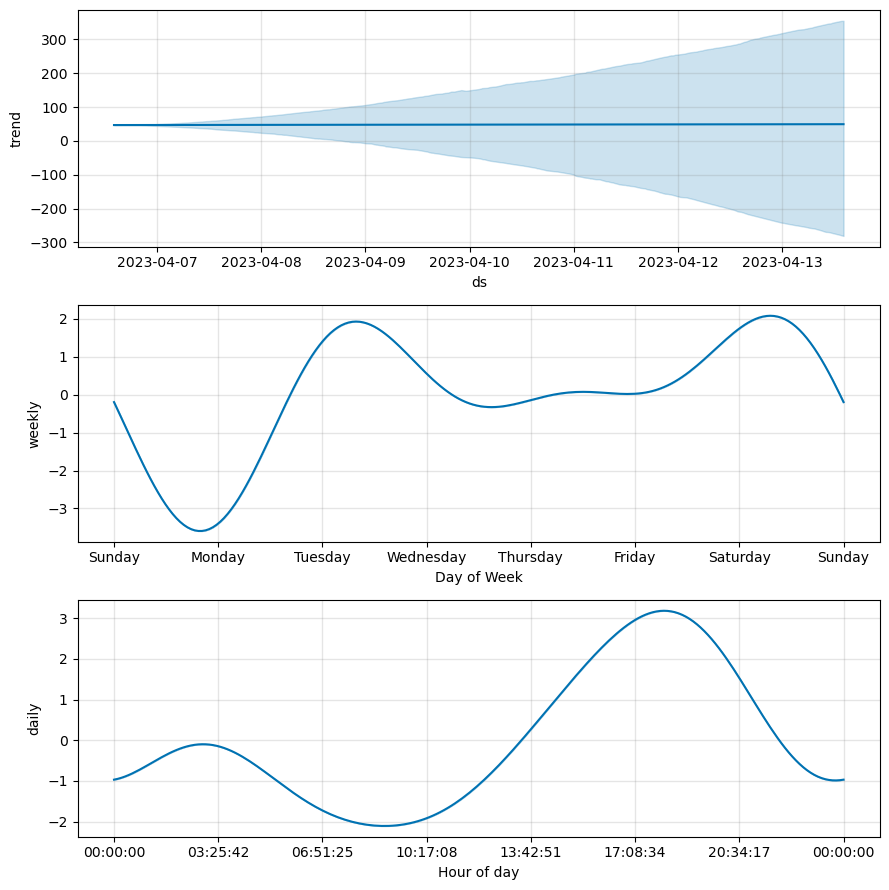

In [16]:
# Full sized plot image
plt.figure()
fig_plot_full = prof.plot(forecast)
# plt.plot_date()
# plt.show
# Detailed plot image
fig_plot = prof.plot(forecast)
plt.ylim(-10,10) # INPUT: Detailed image config
plt.xlim(pd.Timestamp('2023-04-04')) # INPUT: Detailed image config
# Trend plot image
fig_trend = prof.plot_components(forecast)


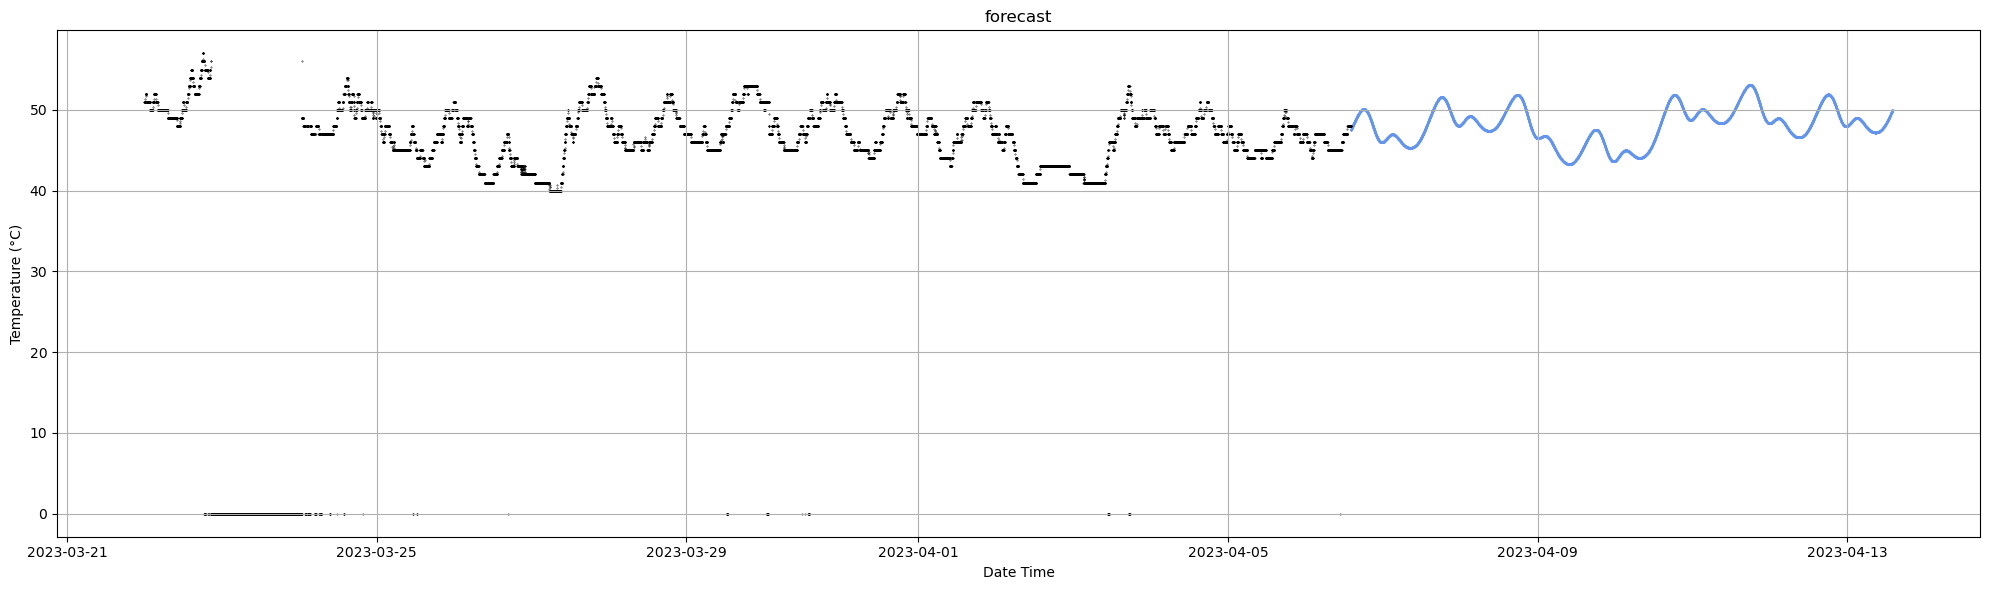

In [20]:
# Plot image (Solicitação Antonio)

x_axis = 'Date Time'
y_axis = 'Temperature (°C)'
title = 'forecast'
feature = 'temperature'
length_circle = 0.1

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.autolayout"] = True
plt.scatter(forecast['ds'], forecast['yhat'], s=length_circle, color="cornflowerblue", label="Regression")
plt.scatter(X_train['ds'], X_train['y'], s=length_circle, color="black", label="Real")
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title(title)
plt.grid(True)
plt.show()
plt.savefig(f'preview_save_neural_prophet_/forecast_{feature}.png')

In [ ]:
# Plot ground truth

plt.figure().set_figwidth(20)
plt.plot_date(X_test['ds'], X_test['y'])

In [ ]:
# Save generated databse in a file (csv)
# import os

# head, tail = os.path.split(input_path)
# out_filename = 'output/generated_' + tail
# out_path = os.path.join(head, out_filename)

# if not(os.path.exists(os.path.join(head, 'output'))):
#     os.mkdir(os.path.join(head, 'output'))

# forecast.to_csv(out_path)

# print("Finished...")
# print("Exporting database: " + out_path)

In [ ]:
# Save plot images

# out_path_plot = os.path.join(head,"output/plot_" + os.path.splitext(tail)[0]+".png")
# out_path_plot_full = os.path.join(head,"output/plot_full_" + os.path.splitext(tail)[0]+".png")
# out_path_plot_trends = os.path.join(head,"output/trends_" + os.path.splitext(tail)[0]+".png")

# fig_plot.savefig(out_path_plot)
# fig_plot_full.savefig(out_path_plot_full)
# fig_trend.savefig(out_path_plot_trends)

# print("Saving plot images (full): " + out_path_plot_full)
# print("Saving plot images (detailed): " + out_path_plot)
# print("Saving plot images (trends): " + out_path_plot_trends)